In [1]:
import torch
from torchvision import transforms as T
from torch.utils.data import DataLoader, Dataset, random_split

from metrics import calculate_metrics, calculate_metrics2, DICE_BCE_Loss, DICE_BCE_Loss2
from my_dataset import My_dataloader


from modules_DeepLabV3 import DeepLabV3Plus
from modules_ResUnet import DeepResUNet
from modules_Unet import Unet

from typing import Any
import click
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
import matplotlib.pyplot as plt

In [3]:
data_dir = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/glaciar_data_L5_L8/glaciar_data_L5L8/testing2/"
#data_dir = "/home/cornelius/Documentos/Glaciar_segmentation_datasets/dataset_glacier/SHOW_SIX_IMAGE/"

INPUT = (256, 256)
CLASSES = 1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model = DeepLabV3Plus(num_classes=CLASSES)
model_1 = Unet(6,1)
model_1.load_state_dict(torch.load("./output/best_model_Unet_L5_L8_C2L1_P1.pth"))
model_1.to(device)

model_2 = DeepResUNet(6,1)
model_2.load_state_dict(torch.load("./output/best_model_DeepResUnet_L5_L8_C2L1_P1.pth"))
model_2.to(device)

model_3 = DeepLabV3Plus(num_classes=CLASSES)
model_3.load_state_dict(torch.load("./output/best_model_DeepLabV3PLus_L5_L8_C2L1_P1.pth"))
model_3.to(device)

eval_transform=T.Compose([T.Resize([INPUT[0], INPUT[1]])])
eval_dataset=My_dataloader(data_dir, transform=eval_transform)
eval_dataloader=DataLoader(eval_dataset, batch_size=1, num_workers=8, shuffle=False)

In [10]:
# Evaluación y visualización
def evaluate_and_plot(eval_dataloader, models, model_names):
    for image, mask in eval_dataloader:
        image = image.to(device)
        mask = mask.to(device)

        fig, ax = plt.subplots(3, 3, figsize=(15, 15))
        fig.subplots_adjust(wspace=0.009, hspace=0.3, left=0.15)  # Ajuste de espacio entre subplots

        for i, (model, model_name) in enumerate(zip(models, model_names)):
            model.eval()
            with torch.no_grad():
                pred = model(image)
                #pred = torch.sigmoid(pred)
                pred = (pred > 0.5).float()

                ###########################################
                # Calcular las métricas
                iou, dice_coefficient, pixel_accuracy = calculate_metrics(pred, mask)
                ###########################################

                #rgb_image = image.cpu().squeeze().permute(1, 2, 0)[..., :3]
                rgb_image = image.cpu().squeeze().permute(1, 2, 0)[..., [2, 1, 0]]

                ax[i, 0].imshow(rgb_image)
                #ax[i, 0].set_title(f'{model_name} - Imagen Original')
                ax[i, 0].set_title("Imagen RGB")
                #ax[i, 0].axis('off')

                ax[i, 1].imshow(mask.cpu().squeeze(), cmap='gray')
                ax[i, 1].set_title('Máscara')
                #ax[i, 1].axis('off')

                ax[i, 2].imshow(pred.cpu().squeeze(), cmap='gray')
                ax[i, 2].set_title('Predicción')
                #ax[i, 2].axis('off')

                # Añadir nombre del modelo en el eje Y
                #ax[i, 0].set_ylabel(model_name, fontsize=14, rotation=0, labelpad=50, ha='right')
                ax[i, 0].set_ylabel(model_name, fontsize=14, rotation=90, labelpad=15, ha='center', va='center')

                ###############
                ax[i, 2].text(0.5, -0.099, f'MIoU: {iou:.4f}, DICE: {dice_coefficient:.4f}, PA: {pixel_accuracy:.4f}',
                           ha='center', va='top', transform=ax[i, 2].transAxes, fontsize=13)
                ###############

        plt.savefig('./output/6_image.png', bbox_inches='tight', dpi=300)  # Ajuste para mejor calidad

        plt.show()

/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


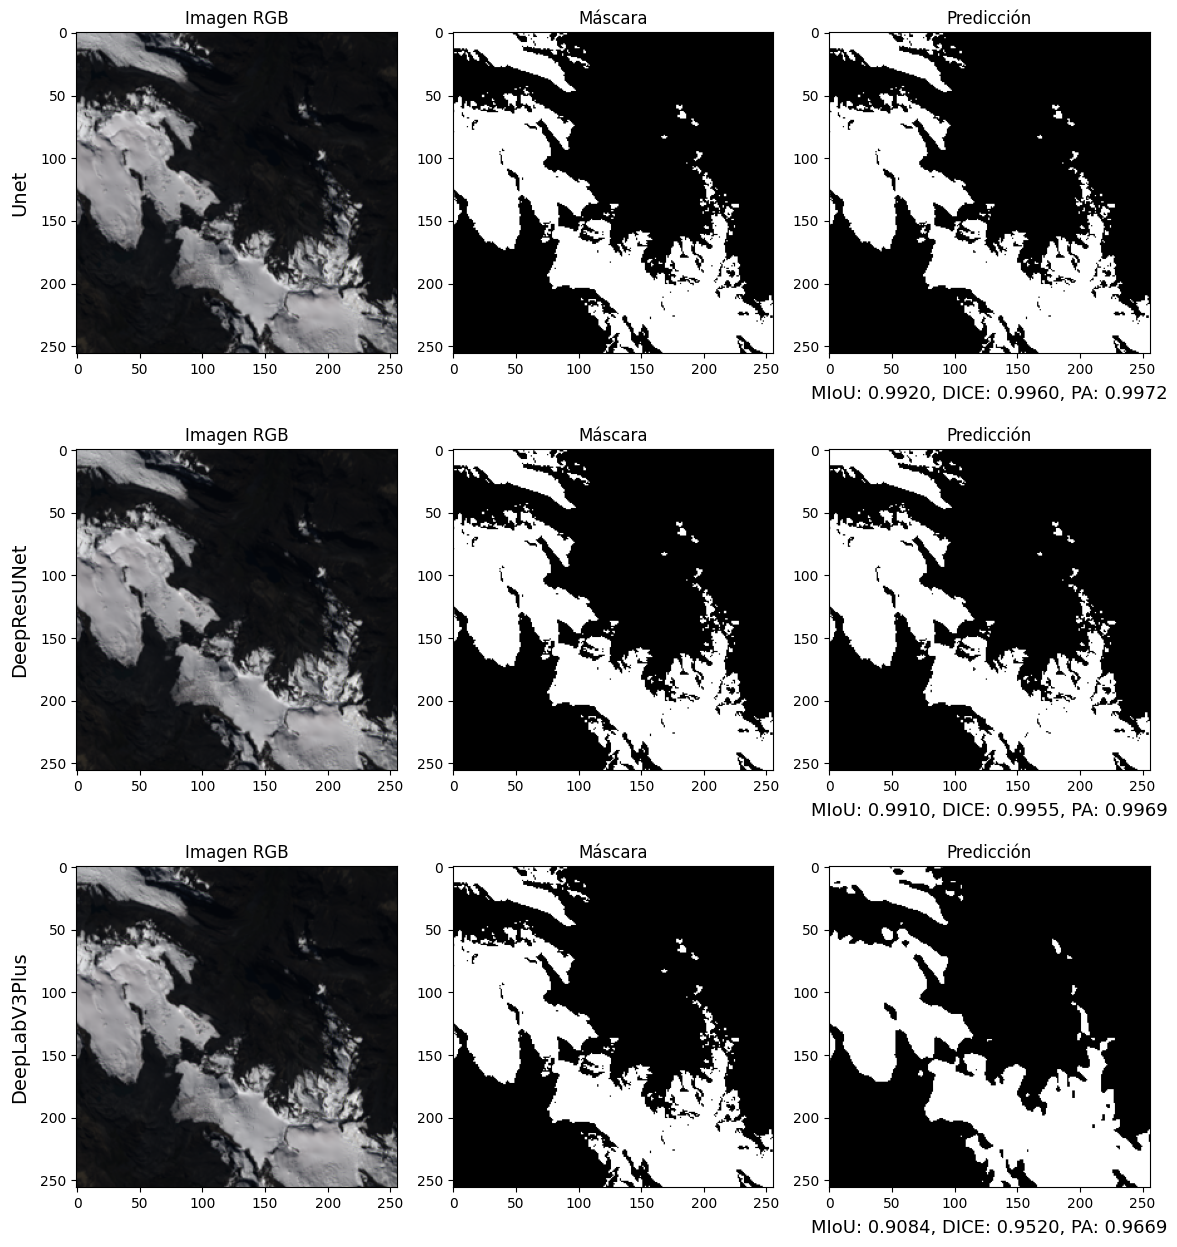

In [11]:
# Lista de modelos y nombres para identificación
models = [model_1, model_2, model_3]
model_names = ["Unet", "DeepResUNet", "DeepLabV3Plus"]

# Llamar a la función para evaluar y visualizar
evaluate_and_plot(eval_dataloader, models, model_names)

In [14]:
data_dir = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/glaciar_data_L5_L8/glaciar_data_L5L8/testing2/"
#data_dir = "/home/cornelius/Documentos/Glaciar_segmentation_datasets/dataset_glacier/SHOW_SIX_IMAGE/"

INPUT = (256, 256)
CLASSES = 1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model = DeepLabV3Plus(num_classes=CLASSES)
model_1 = Unet(6,1)
model_1.load_state_dict(torch.load("./output/best_model_Unet_L5_L8_C2L1_P1.pth"))
model_1.to(device)

model_2 = DeepResUNet(6,1)
model_2.load_state_dict(torch.load("./output/best_model_DeepResUnet_L5_L8_C2L1_P1.pth"))
model_2.to(device)

model_3 = DeepLabV3Plus(num_classes=CLASSES)
model_3.load_state_dict(torch.load("./output/best_model_DeepLabV3PLus_L5_L8_C2L1_P1.pth"))
model_3.to(device)

eval_transform=T.Compose([T.Resize([INPUT[0], INPUT[1]])])
eval_dataset=My_dataloader(data_dir, transform=eval_transform)
eval_dataloader=DataLoader(eval_dataset, batch_size=1, num_workers=8, shuffle=False)

In [ ]:
# Evaluación y visualización
def evaluate_and_plot(eval_dataloader, models, model_names):
    for image, mask in eval_dataloader:
        image = image.to(device)
        mask = mask.to(device)

        fig, ax = plt.subplots(3, 5, figsize=(15, 9))
        fig.subplots_adjust(wspace=0.009, hspace=0.3, left=0.15)  # Ajuste de espacio entre subplots

        for i, (model, model_name) in enumerate(zip(models, model_names)):
            model.eval()
            with torch.no_grad():
                pred = model(image)
                #pred = torch.sigmoid(pred)
                pred = (pred > 0.5).float()

                ###########################################
                # Calcular las métricas
                iou, dice_coefficient, pixel_accuracy = calculate_metrics(pred, mask)
                ###########################################

                #rgb_image = image.cpu().squeeze().permute(1, 2, 0)[..., :3]
                rgb_image = image.cpu().squeeze().permute(1, 2, 0)[..., [2, 1, 0]]
                for i in range(3):

                    ax[i, 0].imshow(rgb_image[i])
                    #ax[i, 0].set_title(f'{model_name} - Imagen Original')
                    ax[i, 0].set_title("Imagen RGB")
                    #ax[i, 0].axis('off')

                    ax[i, 1].imshow(mask[i].cpu().squeeze(), cmap='gray')
                    ax[i, 1].set_title('Máscara')
                    #ax[i, 1].axis('off')

                    ax[i, 2].imshow(pred.cpu().squeeze(), cmap='gray')
                    ax[i, 2].set_title('Predicción')
                    #ax[i, 2].axis('off')

                    # Añadir nombre del modelo en el eje Y
                    #ax[i, 0].set_ylabel(model_name, fontsize=14, rotation=0, labelpad=50, ha='right')
                    ax[i, 0].set_ylabel(model_name, fontsize=14, rotation=90, labelpad=15, ha='center', va='center')

                    ###############
                    ax[i, 2].text(0.5, -0.099, f'MIoU: {iou:.4f}, DICE: {dice_coefficient:.4f}, PA: {pixel_accuracy:.4f}',
                            ha='center', va='top', transform=ax[i, 2].transAxes, fontsize=13)
                    ###############

        plt.savefig('./output/6_image.png', bbox_inches='tight', dpi=300)  # Ajuste para mejor calidad

        plt.show()

In [ ]:
# Lista de modelos y nombres para identificación
models = [model_1, model_2, model_3]
model_names = ["Unet", "DeepResUNet", "DeepLabV3Plus"]

# Llamar a la función para evaluar y visualizar
evaluate_and_plot(eval_dataloader, models, model_names)

/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransf

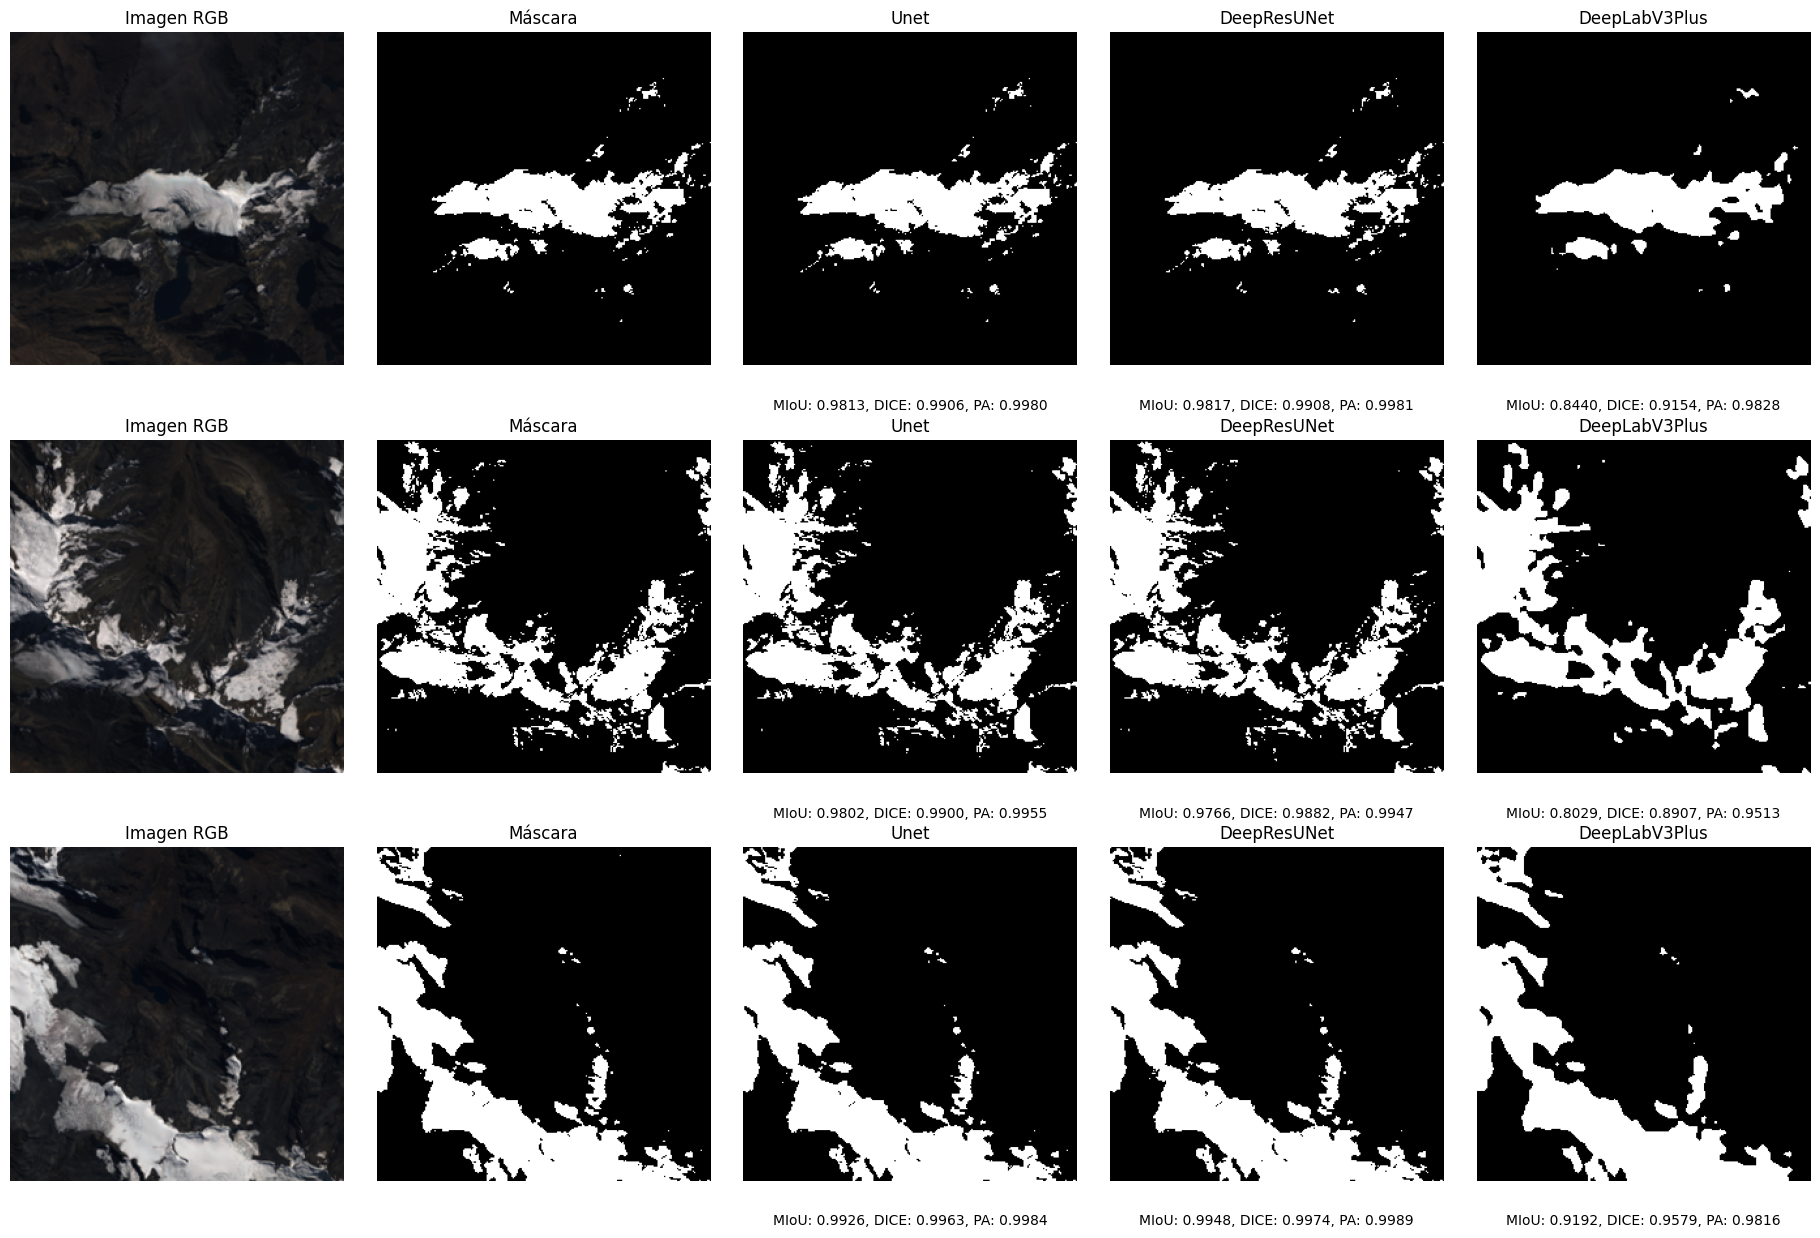

In [22]:
# Evaluación y visualización
def evaluate_and_plot(eval_dataloader, models, model_names):
    fig, ax = plt.subplots(3, 5, figsize=(20, 15))  # Tamaño ajustado para 3 filas y 5 columnas
    fig.subplots_adjust(wspace=0.1, hspace=0.2, left=0.05, right=0.95)  # Ajuste de espacio entre subplots
    
    for idx, (image, mask) in enumerate(eval_dataloader):  # Iterar sobre las primeras 3 imágenes
        if idx >= 3:  # Limitar a 3 imágenes
            break
        
        image = image.to(device)
        mask = mask.to(device)

        # Convertir la imagen multiespectral a RGB
        rgb_image = image.cpu().squeeze().permute(1, 2, 0)[..., [2, 1, 0]]  # Bandas R, G, B
        rgb_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())  # Normalización

        # Columna 1: Imagen RGB
        ax[idx, 0].imshow(rgb_image)
        ax[idx, 0].set_title("Imagen RGB")
        ax[idx, 0].axis('off')

        # Columna 2: Máscara Ground Truth
        ax[idx, 1].imshow(mask.cpu().squeeze(), cmap='gray')
        ax[idx, 1].set_title("Máscara")
        ax[idx, 1].axis('off')

        # Generar predicciones para los 3 modelos
        for i, (model, model_name) in enumerate(zip(models, model_names)):
            model.eval()
            with torch.no_grad():
                pred = model(image)
                pred = (pred > 0.5).float()

                # Columna 3, 4, 5: Predicciones del modelo 1, 2, 3 respectivamente
                ax[idx, i + 2].imshow(pred.cpu().squeeze(), cmap='gray')
                ax[idx, i + 2].set_title(model_name)
                ax[idx, i + 2].axis('off')

                # Calcular las métricas
                iou, dice_coefficient, pixel_accuracy = calculate_metrics(pred, mask)

                # Añadir métricas debajo de cada predicción
                ax[idx, i + 2].text(0.5, -0.1, f'MIoU: {iou:.4f}, DICE: {dice_coefficient:.4f}, PA: {pixel_accuracy:.4f}',
                                    ha='center', va='top', transform=ax[idx, i + 2].transAxes, fontsize=10)

    plt.savefig('./output/comparative_predictions.png', bbox_inches='tight', dpi=300)  # Guardar como una sola imagen
    plt.show()

# Lista de modelos y nombres para identificación
models = [model_1, model_2, model_3]
model_names = ["Unet", "DeepResUNet", "DeepLabV3Plus"]

# Llamar a la función para evaluar y visualizar
evaluate_and_plot(eval_dataloader, models, model_names)


/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransf

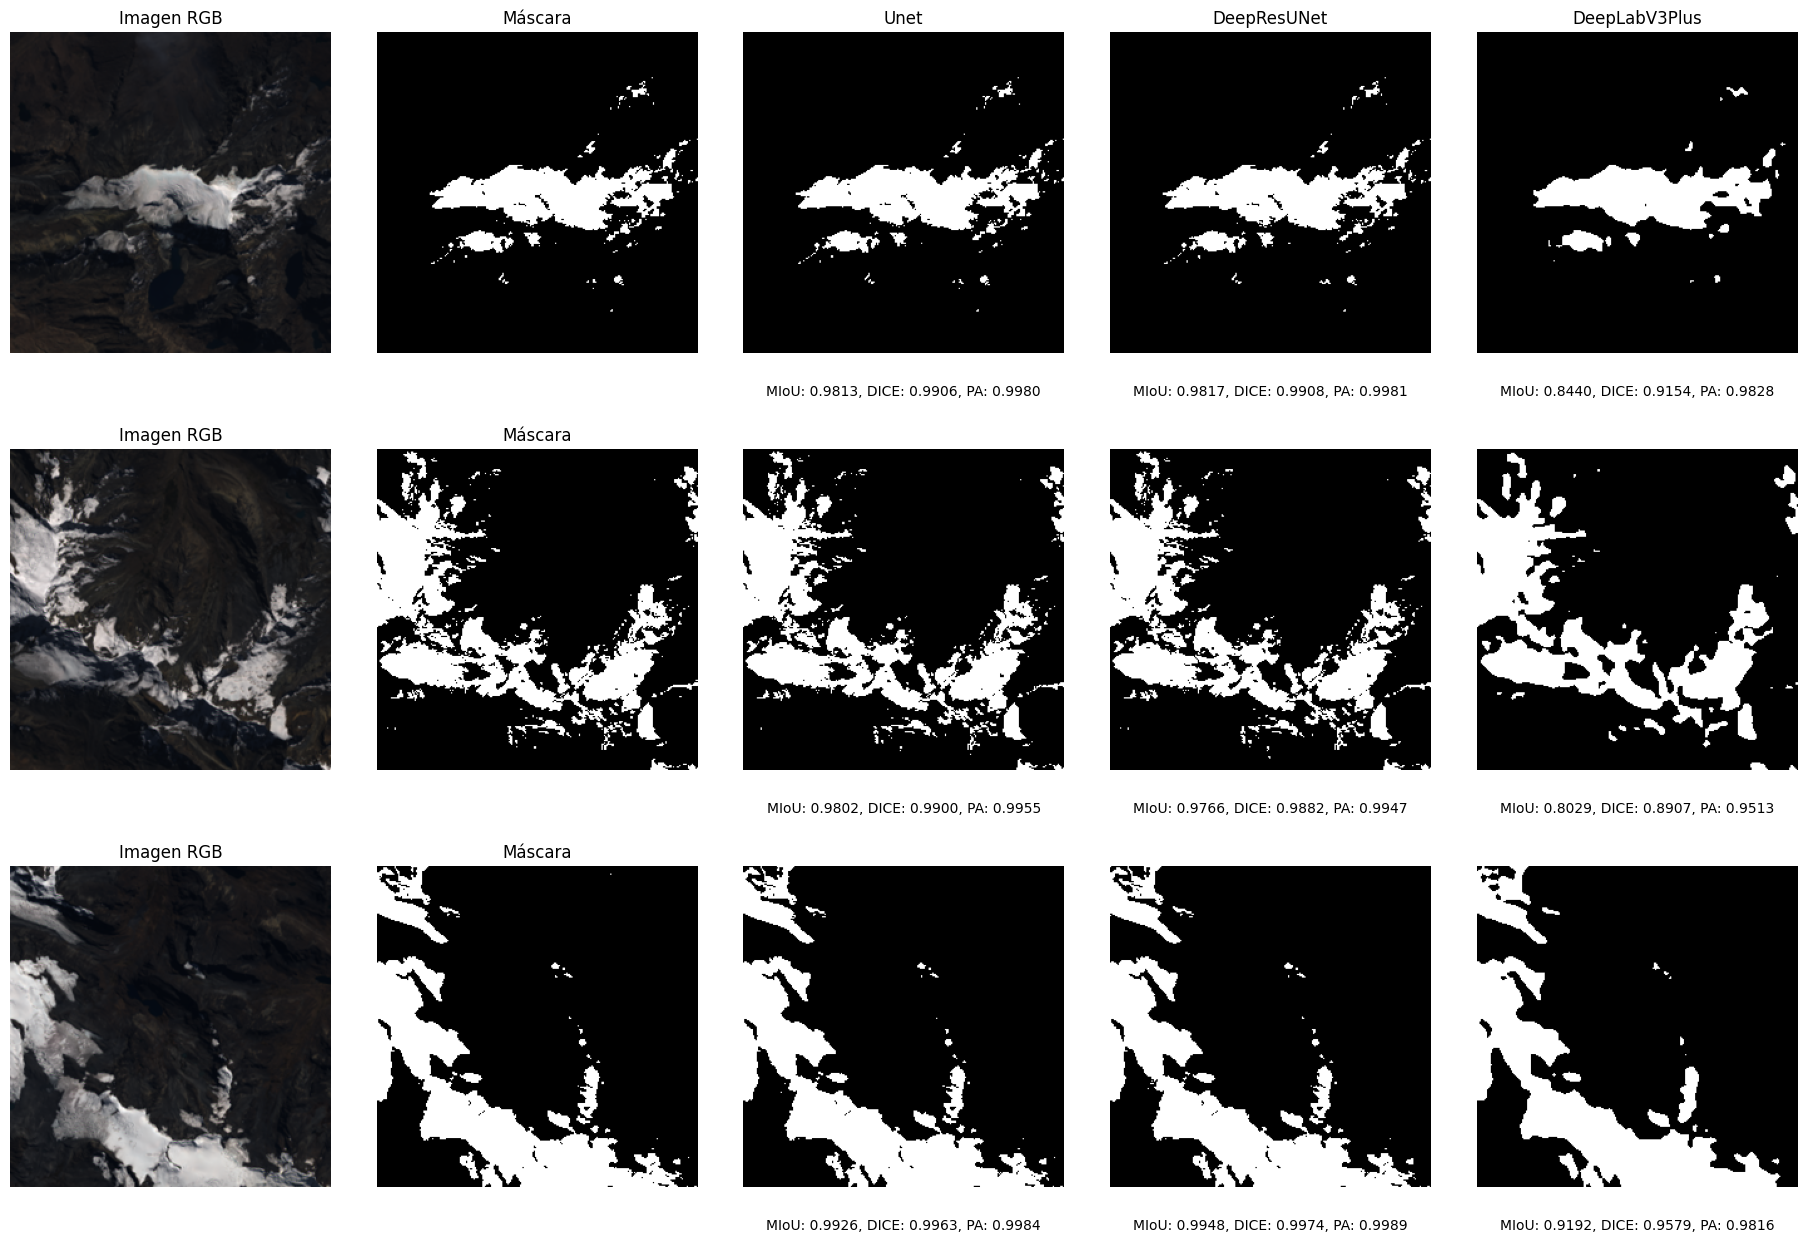

In [23]:
# Evaluación y visualización
def evaluate_and_plot(eval_dataloader, models, model_names):
    fig, ax = plt.subplots(3, 5, figsize=(20, 15))  # Tamaño ajustado para 3 filas y 5 columnas
    fig.subplots_adjust(wspace=0.1, hspace=0.3, left=0.05, right=0.95)  # Ajuste de espacio entre subplots
    
    for idx, (image, mask) in enumerate(eval_dataloader):  # Iterar sobre las primeras 3 imágenes
        if idx >= 3:  # Limitar a 3 imágenes
            break
        
        image = image.to(device)
        mask = mask.to(device)

        # Convertir la imagen multiespectral a RGB
        rgb_image = image.cpu().squeeze().permute(1, 2, 0)[..., [2, 1, 0]]  # Bandas R, G, B
        rgb_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())  # Normalización

        # Columna 1: Imagen RGB
        ax[idx, 0].imshow(rgb_image)
        ax[idx, 0].set_title("Imagen RGB")
        ax[idx, 0].axis('off')

        # Columna 2: Máscara Ground Truth
        ax[idx, 1].imshow(mask.cpu().squeeze(), cmap='gray')
        ax[idx, 1].set_title("Máscara")
        ax[idx, 1].axis('off')

        # Generar predicciones para los 3 modelos
        for i, (model, model_name) in enumerate(zip(models, model_names)):
            model.eval()
            with torch.no_grad():
                pred = model(image)
                pred = (pred > 0.5).float()

                # Columna 3, 4, 5: Predicciones del modelo 1, 2, 3 respectivamente
                ax[idx, i + 2].imshow(pred.cpu().squeeze(), cmap='gray')

                # Mostrar títulos de modelos SOLO en la PRIMERA FILA
                if idx == 0:
                    ax[idx, i + 2].set_title(model_name)

                ax[idx, i + 2].axis('off')

                # Calcular las métricas
                iou, dice_coefficient, pixel_accuracy = calculate_metrics(pred, mask)

                # Añadir métricas debajo de cada predicción
                ax[idx, i + 2].text(0.5, -0.1, f'MIoU: {iou:.4f}, DICE: {dice_coefficient:.4f}, PA: {pixel_accuracy:.4f}',
                                    ha='center', va='top', transform=ax[idx, i + 2].transAxes, fontsize=10)

    plt.savefig('./output/comparative_predictions.png', bbox_inches='tight', dpi=300)  # Guardar como una sola imagen
    plt.show()

# Lista de modelos y nombres para identificación
models = [model_1, model_2, model_3]
model_names = ["Unet", "DeepResUNet", "DeepLabV3Plus"]

# Llamar a la función para evaluar y visualizar
evaluate_and_plot(eval_dataloader, models, model_names)


/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransf

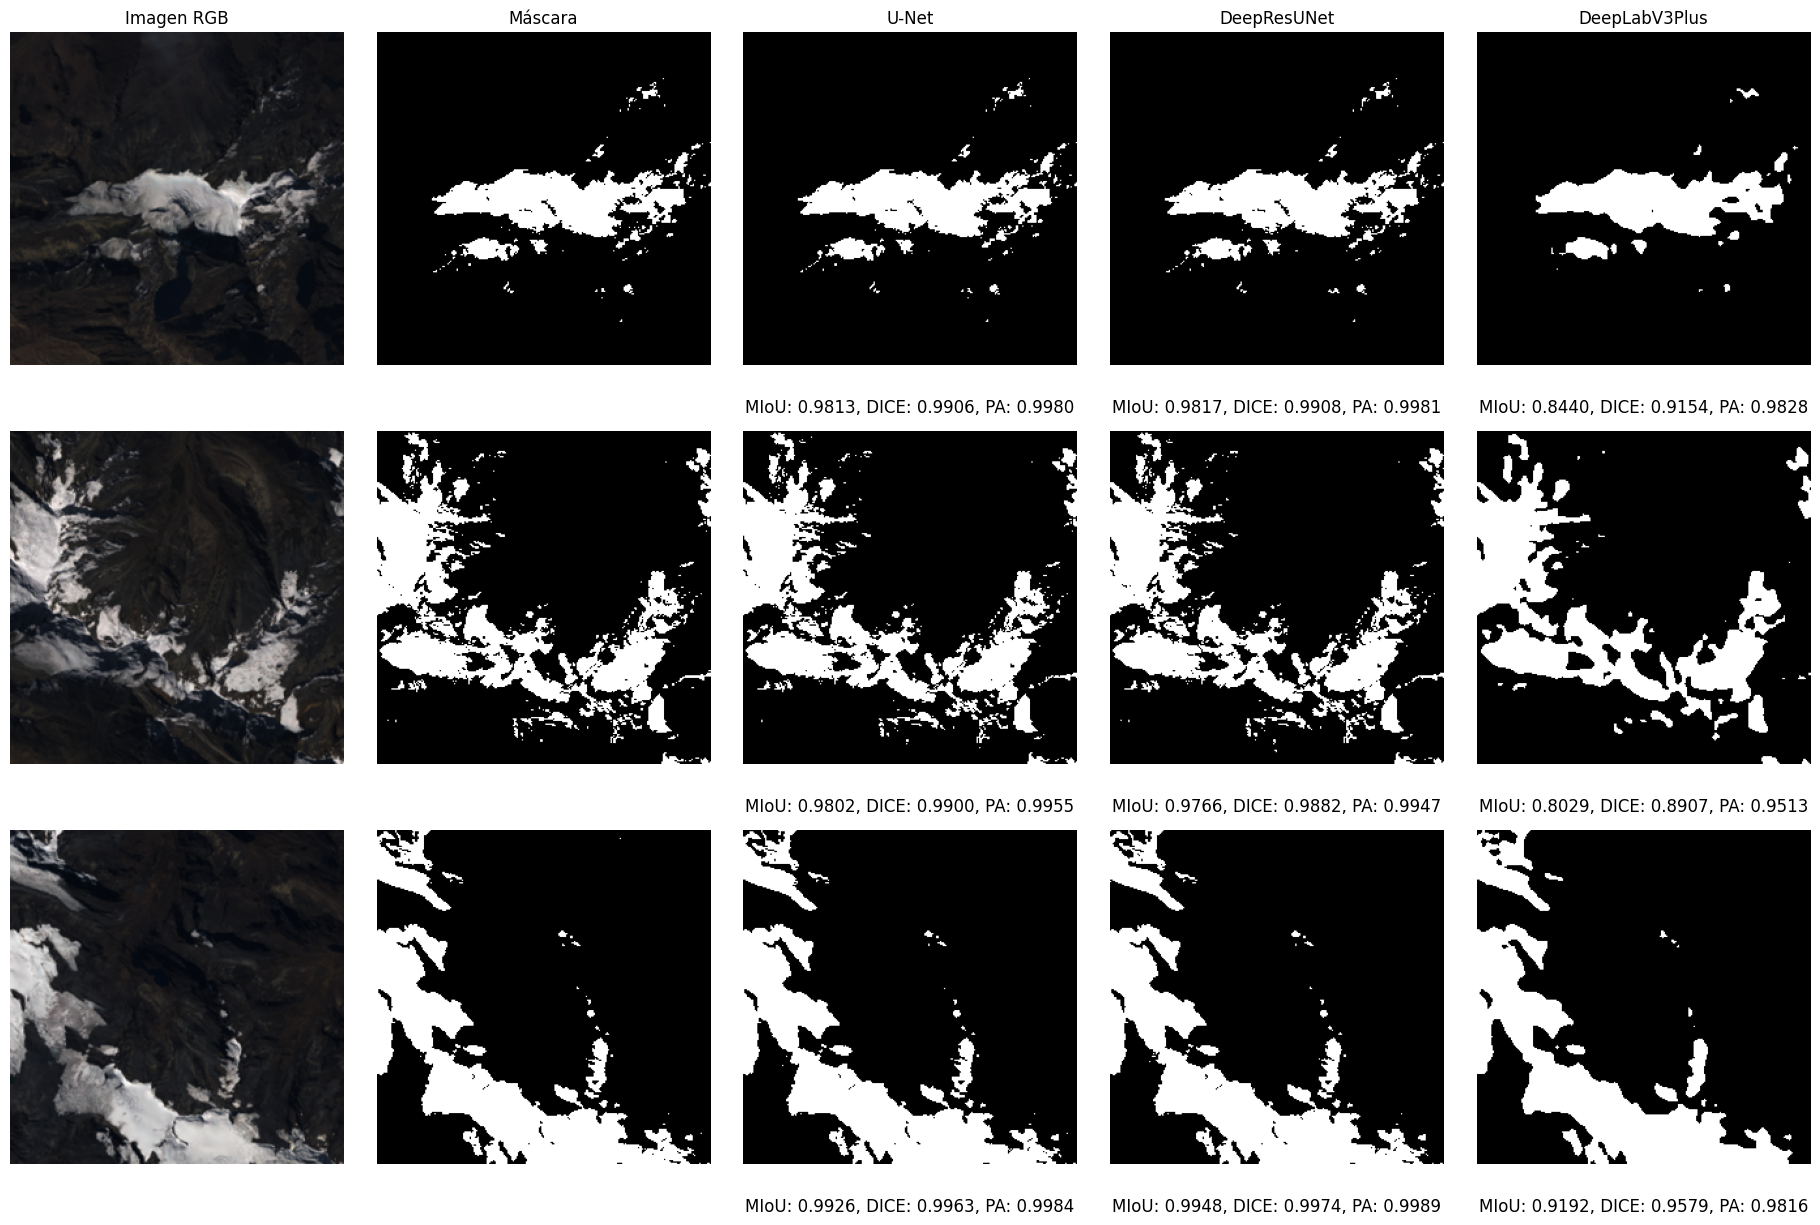

In [33]:
# Evaluación y visualización
def evaluate_and_plot(eval_dataloader, models, model_names):
    fig, ax = plt.subplots(3, 5, figsize=(20, 15))  # Tamaño ajustado para 3 filas y 5 columnas
    fig.subplots_adjust(wspace=0.1, hspace=0.12, left=0.05, right=0.95)  # Ajuste de espacio entre subplots
    
    for idx, (image, mask) in enumerate(eval_dataloader):  # Iterar sobre las primeras 3 imágenes
        if idx >= 3:  # Limitar a 3 imágenes
            break
        
        image = image.to(device)
        mask = mask.to(device)

        # Convertir la imagen multiespectral a RGB
        rgb_image = image.cpu().squeeze().permute(1, 2, 0)[..., [2, 1, 0]]  # Bandas R, G, B
        rgb_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())  # Normalización

        # Columna 1: Imagen RGB
        ax[idx, 0].imshow(rgb_image)
        if idx == 0:
            ax[idx, 0].set_title("Imagen RGB")  # Mostrar título solo en la primera fila
        ax[idx, 0].axis('off')

        # Columna 2: Máscara Ground Truth
        ax[idx, 1].imshow(mask.cpu().squeeze(), cmap='gray')
        if idx == 0:
            ax[idx, 1].set_title("Máscara")  # Mostrar título solo en la primera fila
        ax[idx, 1].axis('off')

        # Generar predicciones para los 3 modelos
        for i, (model, model_name) in enumerate(zip(models, model_names)):
            model.eval()
            with torch.no_grad():
                pred = model(image)
                pred = (pred > 0.5).float()

                # Columna 3, 4, 5: Predicciones del modelo 1, 2, 3 respectivamente
                ax[idx, i + 2].imshow(pred.cpu().squeeze(), cmap='gray')

                # Mostrar títulos de modelos SOLO en la PRIMERA FILA
                if idx == 0:
                    ax[idx, i + 2].set_title(model_name)

                ax[idx, i + 2].axis('off')

                # Calcular las métricas
                iou, dice_coefficient, pixel_accuracy = calculate_metrics(pred, mask)

                # Añadir métricas debajo de cada predicción
                ax[idx, i + 2].text(0.5, -0.1, f'MIoU: {iou:.4f}, DICE: {dice_coefficient:.4f}, PA: {pixel_accuracy:.4f}',
                                    ha='center', va='top', transform=ax[idx, i + 2].transAxes, fontsize=12)

    plt.savefig('./output/comparative_predictions.png', bbox_inches='tight', dpi=300)  # Guardar como una sola imagen
    plt.show()

# Lista de modelos y nombres para identificación
models = [model_1, model_2, model_3]
model_names = ["U-Net", "DeepResUNet", "DeepLabV3Plus"]

# Llamar a la función para evaluar y visualizar
evaluate_and_plot(eval_dataloader, models, model_names)
